# Writing a Perceptron classifier from scratch

The Perceptron is a simple classification algorithm suitable for problems in which classes are linearly separable in feature space. Let's code a single-layer Perceptron classifier from scratch, in Python.

In [196]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from pprint import pprint

plt.style.use("fivethirtyeight")
%matplotlib inline

## Import and prepare dataset

In [197]:
# Generate a dataset with two classes using an ordinal encoding scheme
features, labels = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0) # random state fixed for reproducible output
labels[labels==0] = -1
print("Input dataset has {} samples, {} features, and {} labels".format(features.shape[0], features.shape[1], np.size(np.unique(labels))))
print(features.shape)
pprint(labels[:10])

Input dataset has 1000 samples, 2 features, and 2 labels
(1000, 2)
array([-1, -1, -1,  1,  1, -1,  1, -1, -1,  1])


## Perform simple exploratory data analysis

The data science workflow consists of several logical steps, one of which is the exploration of the input dataset. This step is also referred to as exploratory data analysis (EDA) and involves investigating the patterns and modes of variability in the data. For example, scatter plots are useful for quick determinations of the linear separability of the input dataset, or for graphical determinations of the strength and direction of the linear relationship between two features. Visualization-based EDA may reveal interesting relationships between features that can provide insight into what other investigations (e.g., principal component analysis) could be performed.

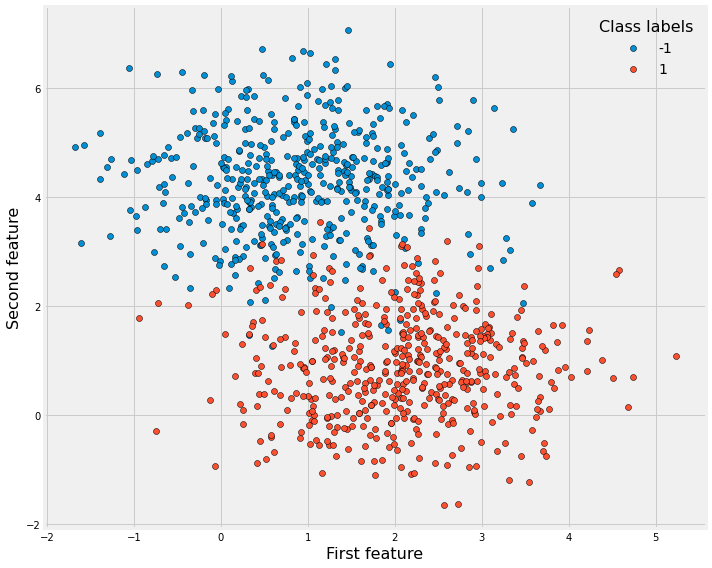

In [198]:
# Visualize relationship between features in 2-D space
fig, ax = plt.subplots(figsize=(10, 8))
for label_val in np.unique(labels):
    ax.scatter(features[labels==label_val,0], features[labels==label_val,1], marker="o", edgecolors="k", label=label_val)
ax.set_xlabel("First feature", fontsize=16)
ax.set_ylabel("Second feature", fontsize=16)
ax.legend(loc="upper right", fontsize=14, frameon=False, title="Class labels", title_fontsize=16)
plt.tight_layout()
plt.show()

## Do train-test split of inputs

In [199]:
# Split input data into training data (75%) and testing data (25%)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25)
print("Input dataset has {} samples".format(features.shape[0]))
print("Training dataset has {} samples".format(features_train.shape[0]))
print("Testing dataset has {} samples".format(features_test.shape[0]))

Input dataset has 1000 samples
Training dataset has 750 samples
Testing dataset has 250 samples


## Code up Perceptron classification algorithm

A Perceptron algorithm fits a linear model with coefficients to build a hyperplane separating data points of the observed classes in the training dataset. Let's create a Perceptron that handles binary classification problems (or tasks). If the number of features is two, the equation of the separating line is: Ax + By + C = 0, where x and y are the selected features, and A, B, and C are the unknown coefficients (A and B are feature weights, whereas C is a constant).

In [200]:
# Use the unit step function as the activation function
def activation_function(inputs):
    outputs = np.where(inputs >= 0, 1, -1)
    return outputs

In [201]:
# Implement a single-layer Perceptron classification algorithm
def perceptron_algorithm(features, labels, n_iter=None, learn_r=None, solver=None):
    # Set the default parameters of the model
    if n_iter == None:
        n_iter = 1000 # number of passes over the training data (aka epochs)
    if learn_r == None:
        learn_r = 0.01 # constant learning rate (must be between 0 and 1)
        
    # Specify the numerical solver (or algorithm) to use in the optimization problem
    # (i.e., the way to train the model)
    # It must be one of "PLR" or "SGD"
    # The solver “PLR” uses the Perceptron Learning Rule
    # The solver “SGD” uses Stochastic Gradient Descent
    if solver == None:
        solver = "SGD" # if none is given, "SGD" will be used
        
    # Fit linear model using the Perceptron Learning Rule
    if solver == "PLR":
        # Initialize the weights and bias to zero
        w1, w2, w0 = 0, 0, 0
        # Perform specified number of epochs of solver on given samples
        for _ in range(n_iter):
            # Iterate over the samples from the training data
            for i in range(len(features)):
                x1_i, x2_i, y_i = features[i,0], features[i,1], labels[i]
                # Predict class label for sample using the linear model
                yhat_unthresh_i = w1*x1_i + w2*x2_i + w0
                # Apply the activation function (i.e., unit step function)
                yhat_thresh_i = activation_function(yhat_unthresh_i)
                # Update the weights and bias
                error = y_i - yhat_thresh_i
                w1 += learn_r*error*x1_i
                w2 += learn_r*error*x2_i
                w0 += learn_r*error
        A, B, C = w1, w2, w0
        
    # Fit linear model using Stochastic Gradient Descent
    elif solver == "SGD":
        # Initialize the weights and bias to zero
        w1, w2, w0 = 0, 0, 0
        # Perform specified number of epochs of solver on given samples
        for _ in range(n_iter):
            # Iterate over the samples from the training data
            for i in range(len(features)):
                x1_i, x2_i, y_i = features[i,0], features[i,1], labels[i]
                # Predict class label for sample using the linear model
                yhat_unthresh_i = w1*x1_i + w2*x2_i + w0
                # Update the weights and bias
                error = y_i - yhat_unthresh_i
                dw1 = error*x1_i
                dw2 = error*x2_i
                dw0 = error
                w1 += learn_r*dw1
                w2 += learn_r*dw2
                w0 += learn_r*dw0
        A, B, C = w1, w2, w0
        
    return A, B, C

In [202]:
# -- Examples of the Perceptron algorithm in action --
# Fit the model according to the training data, and get the fitted coefficients
A1, B1, C1 = perceptron_algorithm(features_train, labels_train, n_iter=500, learn_r=0.01, solver="PLR")
print("PLR: Coefficients in decision function are: A={:.5f}, B={:.5f}, and C={:.5f}".format(A1, B1, C1))
A2, B2, C2 = perceptron_algorithm(features_train, labels_train, n_iter=500, learn_r=0.01, solver="SGD")
print("SGD: Coefficients in decision function are: A={:.5f}, B={:.5f}, and C={:.5f}".format(A2, B2, C2))

PLR: Coefficients in decision function are: A=0.05154, B=-0.21440, and C=0.40000
SGD: Coefficients in decision function are: A=0.12951, B=-0.45422, and C=0.83634


## Make predictions and compute their accuracy

Predict class labels for samples in the testing data. Then compute the fraction of correctly classified samples (i.e., the accuracy classification score).

In [203]:
def perceptron_classifier(features_sampl, labels_true, A, B, C):
    # Predict class labels for samples using the linear model
    labels_pred_unthresh = A*features_sampl[:,0] + B*features_sampl[:,1] + C
    # Apply the activation function (i.e., unit step function)
    labels_pred_thresh = activation_function(labels_pred_unthresh)
    # Compute the proportion of correct predictions
    bool_pred_wrt_true = labels_pred_thresh==labels_true
    score = np.sum(bool_pred_wrt_true==True)/len(bool_pred_wrt_true)
    return labels_pred_thresh, score

In [204]:
# -- Examples of the Perceptron classifier in action --
# Predict class labels for testing data points
_, score1 = perceptron_classifier(features_test, labels_test, A1, B1, C1)
print("PLR: Fraction of correctly classified samples is: {:.3f}".format(score1))
_, score2 = perceptron_classifier(features_test, labels_test, A2, B2, C2)
print("SGD: Fraction of correctly classified samples is: {:.3f}".format(score2))

PLR: Fraction of correctly classified samples is: 0.976
SGD: Fraction of correctly classified samples is: 0.972


## Visualize decision boundary

A decision boundary is the hyperplane separating the feature space into decision regions, in which all samples are assigned to the same class. The decision boundary of a Perceptron classifier in 2-D feature space is a line.

In [205]:
def get_m_and_b(A, B, C):
    # Transform the general form of the linear equation into the slope-intercept form (y = mx + b)
    # The general form of the linear equation (Ax + By + C = 0) can be written as a linear function of y
    # The graph of this function is a line of equation y = (-A/B)x + (-C/B)
    m = -A/B
    b = -C/B
    return m, b

In [206]:
# -- Examples of the m and b getter function in action --
# Get the slope and y-intercept of the separating line
m1, b1 = get_m_and_b(A1, B1, C1)
print("PLR: Decision boundary is line with slope of {:.3f} and y-intercept of {:.2f}".format(m1, b1))
m2, b2 = get_m_and_b(A2, B2, C2)
print("SGD: Decision boundary is line with slope of {:.3f} and y-intercept of {:.2f}".format(m2, b2))

PLR: Decision boundary is line with slope of 0.240 and y-intercept of 1.87
SGD: Decision boundary is line with slope of 0.285 and y-intercept of 1.84


### Binary classification using Perceptron Learning Rule

For 1 epochs, accuracy classification score is: 0.960
For 10 epochs, accuracy classification score is: 0.964
For 100 epochs, accuracy classification score is: 0.964
For 1000 epochs, accuracy classification score is: 0.976


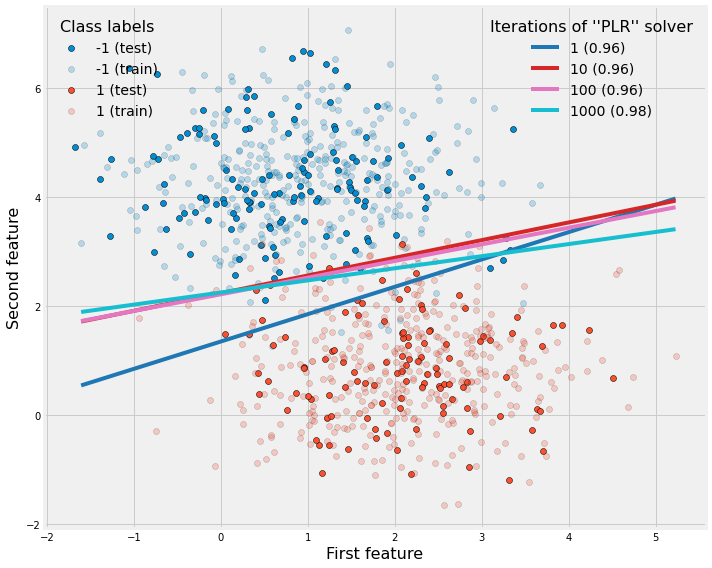

In [207]:
# Implement the "PLR" solver, and adjust the number of iterations used in the algorithm
# Plot the resulting decision boundaries in 2-D feature space
coeff_score_dict1 = {}
fig, ax = plt.subplots(figsize=(10, 8))
sps = []
for label_val in np.unique(labels_train):
    sp1 = ax.scatter(features_test[labels_test==label_val,0], features_test[labels_test==label_val,1], marker="o", edgecolors="k", label="{} (test)".format(label_val))
    sp2 = ax.scatter(features_train[labels_train==label_val,0], features_train[labels_train==label_val,1], marker="o", facecolors=sp1.get_facecolor(), alpha=0.25, edgecolors="k", label="{} (train)".format(label_val))
    sps.extend((sp1, sp2))
# Find x and y values on the decision boundary
x_DB = np.linspace(np.min(features_train[:,0]), np.max(features_train[:,0]), 100)
n_iters1 = [1, 10, 100, 1000]
cmap_arr = cm.get_cmap("tab10", len(n_iters1))
color_iters = cmap_arr(np.arange(cmap_arr.N))
lps = []
for n_iter, color_iter in zip(n_iters1, color_iters):
    A, B, C = perceptron_algorithm(features_train, labels_train, n_iter=n_iter, learn_r=0.01, solver="PLR")
    _, score = perceptron_classifier(features_test, labels_test, A, B, C)
    coeff_score_dict1[(A, B, C)] = score
    print("For {} epochs, accuracy classification score is: {:.3f}".format(n_iter, score))
    m, b = get_m_and_b(A, B, C)
    y_DB = m*x_DB + b
    lp, = ax.plot(x_DB, y_DB, color=color_iter, linestyle="solid", label="{} ({:.2f})".format(n_iter, score))
    lps.append(lp)
ax.set_xlabel("First feature", fontsize=16)
ax.set_ylabel("Second feature", fontsize=16)
leg1 = ax.legend(handles=sps, loc="upper left", fontsize=14, frameon=False, title="Class labels", title_fontsize=16)
ax.add_artist(leg1)
ax.legend(handles=lps, loc="upper right", fontsize=14, frameon=False, title="Iterations of ''PLR'' solver", title_fontsize=16)
plt.tight_layout()
plt.show()

### Binary classification using Stochastic Gradient Descent

For 1 epochs, accuracy classification score is: 0.956
For 10 epochs, accuracy classification score is: 0.972
For 100 epochs, accuracy classification score is: 0.972
For 1000 epochs, accuracy classification score is: 0.972


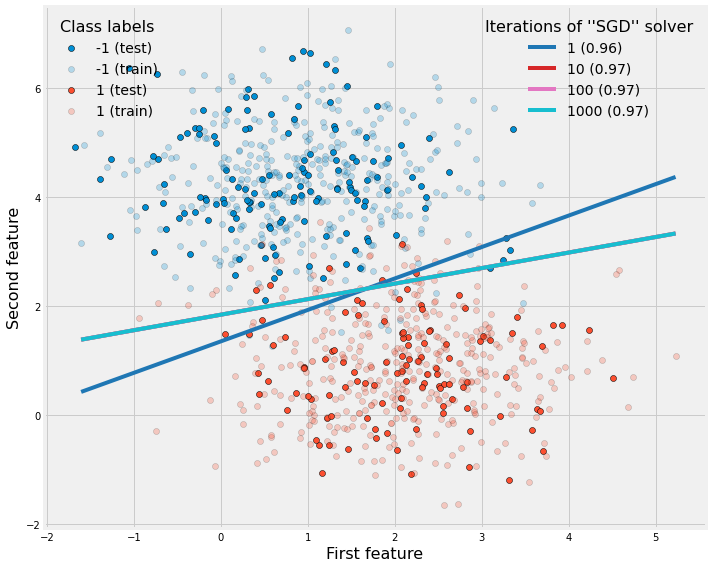

In [208]:
# Implement the "SGD" solver, and adjust the number of iterations used in the algorithm
# Plot the resulting decision boundaries in 2-D feature space
coeff_score_dict2 = {}
fig, ax = plt.subplots(figsize=(10, 8))
sps = []
for label_val in np.unique(labels_train):
    sp1 = ax.scatter(features_test[labels_test==label_val,0], features_test[labels_test==label_val,1], marker="o", edgecolors="k", label="{} (test)".format(label_val))
    sp2 = ax.scatter(features_train[labels_train==label_val,0], features_train[labels_train==label_val,1], marker="o", facecolors=sp1.get_facecolor(), alpha=0.25, edgecolors="k", label="{} (train)".format(label_val))
    sps.extend((sp1, sp2))
# Find x and y values on the decision boundary
x_DB = np.linspace(np.min(features_train[:,0]), np.max(features_train[:,0]), 100)
n_iters2 = [1, 10, 100, 1000]
cmap_arr = cm.get_cmap("tab10", len(n_iters2))
color_iters = cmap_arr(np.arange(cmap_arr.N))
lps = []
for n_iter, color_iter in zip(n_iters2, color_iters):
    A, B, C = perceptron_algorithm(features_train, labels_train, n_iter=n_iter, learn_r=0.01, solver="SGD")
    _, score = perceptron_classifier(features_test, labels_test, A, B, C)
    coeff_score_dict2[(A, B, C)] = score
    print("For {} epochs, accuracy classification score is: {:.3f}".format(n_iter, score))
    m, b = get_m_and_b(A, B, C)
    y_DB = m*x_DB + b
    lp, = ax.plot(x_DB, y_DB, color=color_iter, linestyle="solid", label="{} ({:.2f})".format(n_iter, score))
    lps.append(lp)
ax.set_xlabel("First feature", fontsize=16)
ax.set_ylabel("Second feature", fontsize=16)
leg1 = ax.legend(handles=sps, loc="upper left", fontsize=14, frameon=False, title="Class labels", title_fontsize=16)
ax.add_artist(leg1)
ax.legend(handles=lps, loc="upper right", fontsize=14, frameon=False, title="Iterations of ''SGD'' solver", title_fontsize=16)
plt.tight_layout()
plt.show()

## How did we do w.r.t. scikit-learn?

Compare our homemade Perceptron classifier to some of the popular binary classifiers in the sklearn.linear_model and sklearn.svm modules.

In [209]:
# Choose the set of fitted coefficients which maximizes testing accuracy
coeff_score_dict = {**coeff_score_dict1, **coeff_score_dict2}
n_iters = [*n_iters1, *n_iters2]
A_best, B_best, C_best = max(coeff_score_dict, key=coeff_score_dict.get)
score_best = coeff_score_dict[(A_best, B_best, C_best)]
n_iter_best = n_iters[np.argmax(list(coeff_score_dict.values()))]
# Find x and y values on the decision boundary
x_DB_best = np.linspace(np.min(features_train[:,0]), np.max(features_train[:,0]), 100)
m_best, b_best = get_m_and_b(A_best, B_best, C_best)
y_DB_best = m_best*x_DB_best + b_best

Our Perceptron: Decision boundary is line with slope of 0.222 and y-intercept of 2.25
sklearn Perceptron: Decision boundary is line with slope of 0.443 and y-intercept of 2.07
sklearn logit regression: Decision boundary is line with slope of 0.293 and y-intercept of 2.21
sklearn SVM: Decision boundary is line with slope of 0.341 and y-intercept of 2.20


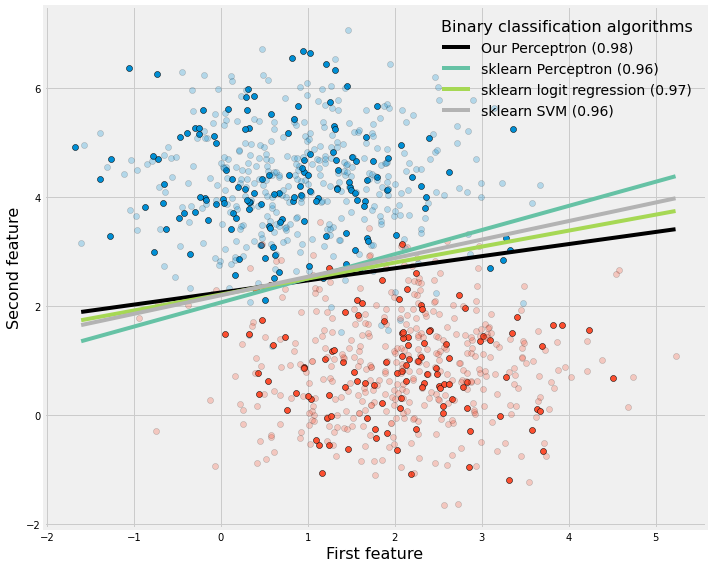

In [210]:
# Compare the decision boundary given by different binary classifiers
fig, ax = plt.subplots(figsize=(10, 8))
for label_val in np.unique(labels_train):
    sp = ax.scatter(features_test[labels_test==label_val,0], features_test[labels_test==label_val,1], marker="o", edgecolors="k")
    ax.scatter(features_train[labels_train==label_val,0], features_train[labels_train==label_val,1], marker="o", facecolors=sp.get_facecolor(), alpha=0.25, edgecolors="k")
ax.plot(x_DB_best, y_DB_best, color="k", linestyle="solid", label="Our Perceptron ({:.2f})".format(score_best))
print("Our Perceptron: Decision boundary is line with slope of {:.3f} and y-intercept of {:.2f}".format(m_best, b_best))
# Create the sklearn classifiers
clfs = [Perceptron(max_iter=n_iter_best, tol=None, shuffle=False), LogisticRegression(), SVC(kernel="linear")]
clf_names = ["sklearn Perceptron", "sklearn logit regression", "sklearn SVM"]
cmap_arr = cm.get_cmap("Set2", len(clfs))
color_clfs = cmap_arr(np.arange(cmap_arr.N))
for clf, clf_name, color_clf in zip(clfs, clf_names, color_clfs):
    # Build the classifier from the training data
    clf.fit(features_train, labels_train)
    # Calculate the mean accuracy on the testing data
    score_skl = clf.score(features_test, labels_test)
    # Get the fitted coefficients
    weights = clf.coef_[0]
    bias = clf.intercept_[0]
    w1, w2, w0 =  weights[0], weights[1], bias
    # Get the slope and y-intercept of the separating line
    m_skl = -(w0/w2)/(w0/w1)
    b_skl = -w0/w2
    # Find x and y values on the decision boundary
    x_DB_skl = np.linspace(np.min(features_train[:,0]), np.max(features_train[:,0]), 100)
    y_DB_skl = m_skl*x_DB + b_skl
    ax.plot(x_DB_skl, y_DB_skl, color=color_clf, linestyle="solid", label="{} ({:.2f})".format(clf_name, score_skl))
    print("{}: Decision boundary is line with slope of {:.3f} and y-intercept of {:.2f}".format(clf_name, m_skl, b_skl))
ax.set_xlabel("First feature", fontsize=16)
ax.set_ylabel("Second feature", fontsize=16)
ax.legend(loc="upper right", fontsize=14, frameon=False, title="Binary classification algorithms", title_fontsize=16)
plt.tight_layout()
plt.show()